Crea una gráfica de barras que represente a los 10 países con más medallas ganadas. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos=pd.read_csv("athlete_events.csv")
datos.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [3]:
data1=datos[['NOC','Medal']]
data1.head()

NOC Medal
0  CHN   NaN
1  CHN   NaN
2  DEN   NaN
3  DEN  Gold
4  NED   NaN

In [4]:
dummies=pd.get_dummies(data1[['Medal']])
dummies.head()

Medal_Bronze  Medal_Gold  Medal_Silver
0             0           0             0
1             0           0             0
2             0           0             0
3             0           1             0
4             0           0             0

In [5]:
concatena=pd.concat([data1,dummies], axis=1)
concatena.head()

NOC Medal  Medal_Bronze  Medal_Gold  Medal_Silver
0  CHN   NaN             0           0             0
1  CHN   NaN             0           0             0
2  DEN   NaN             0           0             0
3  DEN  Gold             0           1             0
4  NED   NaN             0           0             0

In [6]:
concatenar=concatena.groupby(['NOC']).sum() #sumatoria a partir de dummies para las columnas que tienen valores numericos
concatenar.head()

Medal_Bronze  Medal_Gold  Medal_Silver
NOC                                        
AFG           2.0         0.0           0.0
AHO           0.0         0.0           1.0
ALB           0.0         0.0           0.0
ALG           8.0         5.0           4.0
AND           0.0         0.0           0.0

In [7]:
#concatenado=concatenar.groupby(['NOC','Medal']).sum() #sumatoria a partir de dummies para las columnas que tienen valores numericos
concatenar["total_medals"]=concatenar["Medal_Gold"]+concatenar["Medal_Silver"]+concatenar["Medal_Bronze"]# se crea la columna que contiene la sumatoria de las medalllas ganadas por País
concatenar.head()

Medal_Bronze  Medal_Gold  Medal_Silver  total_medals
NOC                                                      
AFG           2.0         0.0           0.0           2.0
AHO           0.0         0.0           1.0           1.0
ALB           0.0         0.0           0.0           0.0
ALG           8.0         5.0           4.0          17.0
AND           0.0         0.0           0.0           0.0

In [8]:
datasort=concatenar.sort_values("total_medals", ascending=False) #Se ordenan de mayor a menor los paises más ganadores
datasort.head()

Medal_Bronze  Medal_Gold  Medal_Silver  total_medals
NOC                                                      
USA        1358.0      2638.0        1641.0        5637.0
URS         689.0      1082.0         732.0        2503.0
GER         746.0       745.0         674.0        2165.0
GBR         651.0       678.0         739.0        2068.0
FRA         666.0       501.0         610.0        1777.0

In [9]:
primeros=datasort[:10] #Se muestran solo los 10 paises más ganadores de medallas
primeros

Medal_Bronze  Medal_Gold  Medal_Silver  total_medals
NOC                                                      
USA        1358.0      2638.0        1641.0        5637.0
URS         689.0      1082.0         732.0        2503.0
GER         746.0       745.0         674.0        2165.0
GBR         651.0       678.0         739.0        2068.0
FRA         666.0       501.0         610.0        1777.0
ITA         531.0       575.0         531.0        1637.0
SWE         535.0       479.0         522.0        1536.0
CAN         451.0       463.0         438.0        1352.0
AUS         517.0       348.0         455.0        1320.0
RUS         408.0       390.0         367.0        1165.0

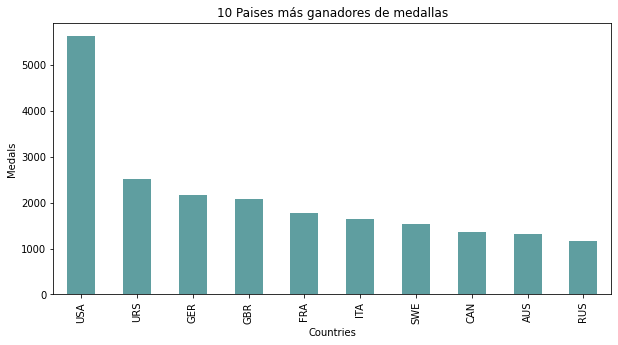

In [14]:
primeros["total_medals"].plot(kind="bar", color='#5F9EA0', figsize=(10,5))
plt.title("10 Paises más ganadores de medallas")
plt.xlabel("Countries")
plt.ylabel("Medals")
plt.savefig('Gráfica de Medallas.jpg')